# Hacker News Posts Analysis

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. 

The dataset used for the analysis is retreived by obtaining a random sample of **20,000** rows from the data which was obtained by removing all the of the rows without any comments.

**Description of the dataset:**
1. **id**: the unique identifier from Hacker News for the post
2. **title**: the title of the post
3. **url**: the URL that the posts links to, if the post has a URL
4. **num_points**: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
5.**num_comments**: the number of comments on the post
6. **author**: the username of the person who submitted the post
7. **created_at**: the date and time of the post's submission

Let us explore a few rows of the dataset.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data=pd.read_csv("hacker_news.csv")

In [3]:
data=pd.DataFrame(data)
data[:5]

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


We're specifically interested in posts with titles that begin with either **Ask HN or Show HN**. Users submit Ask HN posts to ask the Hacker News community a specific question. 
Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just something interesting.

Since we're only concerned with post titles beginning with Ask HN or Show HN, we'll create a new column, "post_type" that categorizes each data row into ask hn or show hn. 

In [4]:
import numpy as np
conditions = [
    (data['title'].str.startswith("Ask HN")==True),
    (data['title'].str.startswith("Show HN")==True)
    ]
        
values = ["ask hn","show hn"]
data['post_type'] = np.select(conditions, values)


Now we will seperate ASK HN and SHOW HN posts.

In [5]:
ask_hn=data[data["post_type"]=="ask hn"]
ask_hn

,id,title,url,num_points,num_comments,author,created_at,post_type
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55,ask hn
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,11/22/2015 13:43,ask hn
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,5/2/2016 10:14,ask hn
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,8/2/2016 14:20,ask hn
31,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,10/15/2015 16:38,ask hn
...,...,...,...,...,...,...,...,...
20039,10994357,Ask HN: Is it feasible to port Apple's Swift t...,NaN,3,17,schappim,1/29/2016 9:42,ask hn
20042,12241954,Ask HN: What to do when a developer goes dark?,NaN,3,3,bittysdad,8/7/2016 12:58,ask hn
20045,12029526,Ask HN: Killer app for AR?,NaN,2,2,davidiach,7/4/2016 8:50,ask hn
20048,11227969,Ask HN: How do you balance a serious relations...,NaN,10,4,audace,3/5/2016 1:25,ask hn


In [6]:
show_hn=data[data["post_type"]=="show hn"]
show_hn

,id,title,url,num_points,num_comments,author,created_at,post_type
13,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,11/25/2015 14:03,show hn
39,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson,11/29/2015 22:46,show hn
46,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu,4/28/2016 18:05,show hn
84,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick,7/28/2016 7:11,show hn
97,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave,1/9/2016 20:45,show hn
...,...,...,...,...,...,...,...,...
19993,11222099,Show HN: Geocoding API built with government o...,https://latlon.io,6,6,evanmarks,3/4/2016 4:50,show hn
19999,11735438,Show HN: Decorating: Animated pulsed for your ...,https://github.com/ryukinix/decorating,3,1,lerax,5/20/2016 3:48,show hn
20014,10200913,Show HN: Idea to startup,https://ideatostartup.org,14,17,nikhildaga,9/10/2015 22:17,show hn
20065,11444393,"Show HN: PhantomJsCloud, Headless Browser SaaS",https://PhantomJsCloud.com,2,1,novaleaf,4/7/2016 3:04,show hn


As we have seen, the questions posts are about 1742 and the posts about showing a project/product / anything else are about 1161.
That means, more people used Hacker News for asking questions in the given time frame.

Now, let us observe which type of posts attract more users i.e. which type of posts have more comments than others.

Now, we will analyse the number of comments for the questions type posts i.e. ASK HN. We will explore, at what times during the day, Hacker News received these posts more than other hours.

In [7]:
ask_comm=sum(ask_hn["num_comments"])
print("Total number of comments for ASK HN:",ask_comm)

Total number of comments for ASK HN: 24466


In [8]:
show_comm=sum(show_hn["num_comments"])
print("Total number of comments for SHOW HN:",show_comm)

Total number of comments for SHOW HN: 11987


Although, the total number of comments on ASK HN posts are much higher than that on SHOW HN posts, we can not use this metric to compare user engagement between the two, as the number of ASK HN posts are also larger, which may/ may not have resulted in more number of comments.

We will now calculate **average number of comments** on both type of posts and compare user engagement using it.

In [9]:
avg_ask_comments=ask_comm/len(ask_hn)
print("Average number of comments for a ASK HN post:\n",avg_ask_comments)

Average number of comments for a ASK HN post:
 14.044776119402986


In [10]:
avg_show_comments=show_comm/len(show_hn)
print("Average number of comments for a SHOW HN post:\n",avg_show_comments)

Average number of comments for a SHOW HN post:
 10.324720068906116


On average, ask posts receive more comments than show posts. Since ask posts are more likely to receive comments, we'll focus our remaining analysis just on these posts.

Now, we will calculate the total number of comments made during per hour of the day, by first extracting hours from created_at column.

In [11]:
import datetime as dt
result_list=ask_hn[["created_at","num_comments"]]
result_list["hour"]=pd.to_datetime(result_list['created_at'])
result_list["hour"]=result_list["hour"].dt.hour

Now we will apply groupby to calculate total number of comments and their sum as well, for each hour of the day.

In [12]:
b=result_list.groupby("hour")["num_comments"].count()
print("Number of comments per hour\n",b)

Number of comments per hour
 hour
0      54
1      60
2      58
3      54
4      47
5      46
6      44
7      34
8      48
9      45
10     59
11     58
12     73
13     85
14    107
15    116
16    108
17    100
18    108
19    110
20     80
21    109
22     71
23     68
Name: num_comments, dtype: int64


In [13]:
a=result_list.groupby("hour")["num_comments"].sum()
a.name="sum_comments"
print("Sum of comments per hour\n",a)

Sum of comments per hour
 hour
0      439
1      683
2     1381
3      421
4      337
5      464
6      397
7      267
8      492
9      251
10     793
11     641
12     687
13    1253
14    1416
15    4477
16    1814
17    1146
18    1430
19    1188
20    1722
21    1745
22     479
23     543
Name: sum_comments, dtype: int64


Now we combine the two series into one dataframe.

In [14]:
df = pd.concat([a, b], axis=1)

In [15]:
df

,sum_comments,num_comments
hour,,
0,439,54
1,683,60
2,1381,58
3,421,54
4,337,47
5,464,46
6,397,44
7,267,34
8,492,48


Now, we calculate average number of comments per hour and sort the data in descending order by average comments per hour.

In [16]:
df["average_comm_by_hour"]=df["sum_comments"]/df["num_comments"]

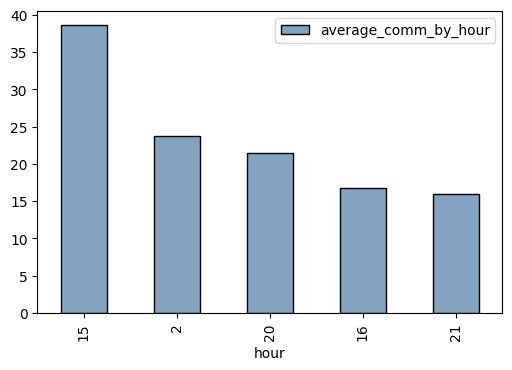

In [17]:
%matplotlib inline
a=df.sort_values(by="average_comm_by_hour",ascending=False).head()
a.plot.bar(y="average_comm_by_hour",color=(0.2, 0.4, 0.6, 0.6),edgecolor="black")

The **Top 5** hours of the day, where average user engagement(comments) on ASK HN posts is highest are **15:00 EST, 2:00 EST, 20:00 EST, 16:00 EST and 21:00 EST**.

Another important parameter that shows user engagement is **num_points**. Although, the number of downvotes (which also depict engagement) has been removed from this number, this measure can be used to determine **positive user engagement** on the platform.

In [18]:
points_list=ask_hn[["created_at","num_points"]]
points_list["hour"]=pd.to_datetime(points_list['created_at'])
points_list["hour"]=points_list["hour"].dt.hour
a=points_list.groupby("hour")["num_points"].sum()
a.name="sum_points"
print("Sum of points per hour\n",a)

Sum of points per hour
 hour
0      449
1      700
2      793
3      374
4      389
5      552
6      591
7      361
8      515
9      329
10    1102
11     825
12     782
13    2062
14    1282
15    3479
16    2522
17    1941
18    1739
19    1513
20    1151
21    1721
22     511
23     581
Name: sum_points, dtype: int64


In [19]:
b=points_list.groupby("hour")["num_points"].count()
b.name="num_points"
print("Number of points per hour\n",b)

Number of points per hour
 hour
0      54
1      60
2      58
3      54
4      47
5      46
6      44
7      34
8      48
9      45
10     59
11     58
12     73
13     85
14    107
15    116
16    108
17    100
18    108
19    110
20     80
21    109
22     71
23     68
Name: num_points, dtype: int64


In [20]:
points=pd.concat([a,b],axis=1)
points["average_points"]=points["sum_points"]/points["num_points"]
a=points.sort_values(by="average_points",ascending=False).head()

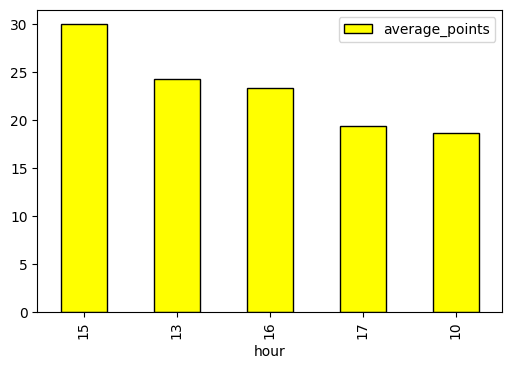

In [21]:
%matplotlib inline
a.plot.bar(y="average_points",color="yellow",edgecolor="black")

The **Top 5** hours of the day, where average positive user engagement(points) on ASK HN posts is highest are **15:00 EST, 13:00 EST, 16:00 EST, 17:00 EST and 10:00 EST**.

## Conclusion

In this project, we analyzed Hacker News data to determine which posts drive the most engagement from users.
We focused majorly on the Ask HN categories as there were more number of Ask HN posts.
Based on our analysis, we recommended that users create Ask posts around **15:00 EST**. This hour has not only a higher chance of attracting more comments but even more points that clearly signifies, how much more people liked the post than those who disliked it.